The purpose of this notebook is to describe a few forecasting methods, starting from the simplest and moving on to the more sophisticated, neural network driven ideas.

You will find the following codes below:

i) Linear Regression

ii) Polynomial Regression

iii) Exponential model

iv) Triple exponential model

v) Tensorflow feed-forward neural network

vi) Long Short Term Memory neural network

----------------------------------------------

Examples and thorough documentation are provided for each code, and

# Linear Regression

In this example, the linear_regression_forecast() function takes a list of numbers (numbers) and a positive integer (k) as input. It first creates the X and y arrays for linear regression, where X represents the indices of the numbers and y represents the numbers themselves.

The function then fits a linear regression model to the data using LinearRegression() from scikit-learn. Once the model is trained, it forecasts the next k values by generating a sequence of indices (forecast_indices) and predicting the corresponding values using the trained model.

Finally, the function returns the forecasts as a list. In the example usage, it prints the forecasted values for the given list numbers and k=3.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def linear_regression_forecast(numbers, k):
    """
    Perform linear regression on a list of numbers and forecast the next k values.

    Parameters:
    - numbers (list): A list of numeric values.
    - k (int): Number of values to forecast.

    Returns:
    - forecasts (list): A list of k forecasted values.

    """

    # Create X and y for linear regression
    X = np.arange(len(numbers)).reshape(-1, 1)
    y = np.array(numbers)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Forecast next k values
    last_index = len(numbers) - 1
    forecast_indices = np.arange(last_index + 1, last_index + k + 1).reshape(-1, 1)
    forecasts = model.predict(forecast_indices)

    return forecasts.tolist()


In [ ]:
# Example:

# Example usage
numbers = [1, 4, 9, 16, 25]
k = 3

forecasts = linear_regression_forecast(numbers, k)
print("Forecasted values:", forecasts)


Forecasted values: [29.0, 34.99999999999999, 40.99999999999999]


# Exercise 1:

Test the code above on a data set that is not very linear and convince yourself that linear regression, while a powerful took, has serious limitations.

# Exercise 2:

Read up on the mathematics of linear regression and discuss it with your group.

# Polynomial regression

In this code, the polynomial_regression_forecast() function is described along with its parameters, return value, and an example usage. The parameters are explained, indicating that numbers should be a list of numeric values, k should be the number of values to forecast, and n should be the maximum degree of the polynomial.

The return value is described as a list of forecasted values. The example usage demonstrates how to use the function, showing the expected input and the resulting forecasted values.

The function uses the PolynomialFeatures class from scikit-learn to transform the input features X into polynomial features of degree n. It then fits a linear regression model using LinearRegression() from scikit-learn.

The documentation is formatted using the docstring conventions in Python, making it easily readable and accessible for users who want to understand and utilize the function.

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regression_forecast(numbers, k, n):
    """
    Perform polynomial regression on a list of numbers and forecast the next k values using polynomials of degree at most n.

    Parameters:
    - numbers (list): A list of numeric values.
    - k (int): Number of values to forecast.
    - n (int): Maximum degree of the polynomial.

    Returns:
    - forecasts (list): A list of k forecasted values.


    """

    # Create X and y for polynomial regression
    X = np.arange(len(numbers)).reshape(-1, 1)
    y = np.array(numbers)

    # Transform X to include polynomial features
    polynomial_features = PolynomialFeatures(degree=n)
    X_poly = polynomial_features.fit_transform(X)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Forecast next k values
    last_index = len(numbers) - 1
    forecast_indices = np.arange(last_index + 1, last_index + k + 1).reshape(-1, 1)
    forecast_indices_poly = polynomial_features.transform(forecast_indices)
    forecasts = model.predict(forecast_indices_poly)

    return forecasts.tolist()


In [ ]:
# Example:

numbers = [1, 3, 6, 10, 15, 21, 28, 36, 45, 55]
k = 3
n = 2
forecasts = polynomial_regression_forecast(numbers, k, n)
print("Forecasted values:", forecasts)

Forecasted values: [66.0, 77.99999999999997, 90.99999999999997]


# Exercise 3:

Test the code above with $N=2$ on cubic data, linear data, etc, and get a good feel for the limitations of the method. Try to be as systematic as you can given the time limitations.

# Exercise 4:

Read up on the mathematics of polynomial regression and discuss it with your group.

# The exponential model:

In this example, the exponential_forecast() function takes a list of real numbers (numbers) and a positive integer (k) as input. It computes the exponential growth rate by dividing the last number by the second-to-last number in the list.

Using the growth rate, it then forecasts the next k values by multiplying the last value in the list by successive powers of the growth rate.

Finally, the function returns the forecasts as a list. In the example usage, it prints the forecasted values for the given list numbers and k=3 using the exponential model.

In [ ]:
import numpy as np

def exponential_forecast(numbers, k):
    """
    Perform exponential forecasting on a list of real numbers and forecast the next k values using the exponential model.

    Parameters:
    - numbers (list): A list of real numbers.
    - k (int): Number of values to forecast.

    Returns:
    - forecasts (list): A list of k forecasted values.

    Example Usage:
    >>> numbers = [1, 2, 4, 8, 16]
    >>> k = 3
    >>> forecasts = exponential_forecast(numbers, k)
    >>> print("Forecasted values:", forecasts)
    Forecasted values: [32.0, 64.0, 128.0]
    """

    # Compute exponential growth rate
    growth_rate = numbers[-1] / numbers[-2]

    # Forecast next k values
    last_value = numbers[-1]
    forecasts = [last_value * (growth_rate ** i) for i in range(1, k + 1)]

    return forecasts

In [ ]:
# Example

numbers = [16, 8, 3.99, 5, 1]
k = 3

forecasts = exponential_forecast(numbers, k)
print("Forecasted values:", forecasts)


Forecasted values: [0.2, 0.04000000000000001, 0.008000000000000002]


# Exercise 5:

This time things need to be done in a slightly reverse order. Read up on how the exponential model works and discuss it with the other participants.

# Exercise 6:

Find data sets that the exponential model gives fairly accurate predictions for. By the way, what constitutes an accurate prediction? Read up on some error measurement methods. Also find some data sets that the exponential model is not particularly accurate on.

# The triple exponential model

In this function, we use the ExponentialSmoothing class from the statsmodels.tsa.holtwinters module to perform the triple exponential smoothing. The trend parameter is set to "add" to capture any additive trend, and the seasonal parameter is set to "add" with seasonal_periods set to 4 to capture any additive seasonal patterns.

To use this function, you can pass your time series data as a list of numbers and the desired number of forecasted values k. The function will return a list of the forecasted values for the next k periods.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def triple_exponential_forecast(data, k):
    """
    Generates forecasts for the next k values using triple exponential smoothing.

    Args:
    - data: A list of numbers representing the time series data.
    - k: A positive integer indicating the number of values to forecast.

    Returns:
    - A list of forecasted values for the next k periods.
    """
    model = ExponentialSmoothing(data, trend="add", seasonal="add", seasonal_periods=4)
    model_fit = model.fit()
    forecast = model_fit.forecast(k)

    return forecast.tolist()


In [ ]:
# Example

data = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
k = 3

forecasts = triple_exponential_forecast(data, k)
print(f"Forecasted values: {forecasts}")


Forecasted values: [29.999915411566253, 31.999848991441436, 33.999885023147094]


# Exercise 7:

Read up on how the triple exponential model works and discuss it with the other participants.

# Exercise 8:

Find data sets that the triple exponential model gives fairly accurate predictions for. Also find some data sets that the triple exponential model is not particularly accurate on.

# Feed-Forward Neural Network

The function forecast_next_values takes in two parameters: numbers (the time series data) and k (the number of previous values to use for forecasting).

The input data is prepared by creating input-output pairs for the feedforward network. X contains sequences of length k as input, and y contains the corresponding next value as the output.

The data is converted to numpy arrays to be compatible with the TensorFlow model.

A feedforward neural network model is created using the Sequential API from Keras. It consists of a dense layer with 10 units and ReLU activation as the input layer, followed by a dense layer with 1 unit as the output layer.

The model is compiled with the mean squared error loss function and the Adam optimizer.

The model is trained on the input-output pairs (X and y) for a specified number of epochs, with a batch size of 1.

To generate forecasts for the next k values, the function uses the trained model. It starts with the last k values from the input data and iteratively predicts the next value using the model. The predicted value is appended to the forecasted values, and the input data is updated by shifting it one step forward and replacing the last value with the predicted value.

The function returns the forecasted values for the next k periods.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def forecast_next_values(numbers, k):
    """
    This function trains a feedforward neural network on a sequence of numbers to forecast the next 'k' values in the series.

    Args:
    numbers (list): List of numbers forming a time series.
    k (int): The number of future values to predict.

    Returns:
    forecasted_values (list): The forecasted future 'k' values.
    """

    # Set the random seeds for reproducibility
    np.random.seed(0)
    tf.random.set_seed(0)

    # Prepare the data for the feedforward network input
    X, y = [], []
    for i in range(len(numbers) - k):
        X.append(numbers[i:i+k])
        y.append(numbers[i+k])

    # Convert the data to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Create the feedforward model
    model = Sequential()
    model.add(Dense(10, input_dim=k, activation='relu'))  # Hidden layer with 10 neurons and ReLU activation
    model.add(Dense(1))  # Output layer

    # Compile the model with MSE as the loss function and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X, y, epochs=100, batch_size=1, verbose=0)

    # Use the model to forecast the next k values
    last_k_values = numbers[-k:]  # Get the last 'k' observed values
    forecasted_values = []
    for _ in range(k):
        input_data = np.reshape(last_k_values, (1, k))  # Reshape the data to fit the model's input shape
        next_value = model.predict(input_data)  # Use the model to forecast the next value
        forecasted_values.append(next_value[0, 0])  # Append the forecasted value to the list of forecasted values
        last_k_values = np.append(last_k_values[1:], next_value[0, 0])  # Update the last 'k' observed values

    return forecasted_values

In [ ]:
# Example:

data = [i/100 for i in range(100)]
k = 3

forecast_next_values(data, k)

1/1 [==============================] - 0s 13ms/step


[1.0015876, 1.0122244, 1.022864]

# Exercise 9:

Read up on how the feed-forward neural network works and discuss it with fellow participants.

# Exercise 10:

This one will require some experimentation. Design a data set for which a properly calibrated feed-forward neural network gives better results than any of the previous forecasting methods.

# Long Short Term Memory Neural Network (LSTM)

This LSTM model is expected to be more effective than a simple feed-forward network due to its ability to remember important information about the input it receives over time. This "memory" of past inputs can help it understand and predict patterns in the time series more accurately. LSTM networks are specifically designed to avoid the long-term dependency problem, remembering information for long periods of time, which is an advantage for time-series forecasting.

Please note that to improve the model's accuracy further, you would typically use a larger dataset, tune the model's hyperparameters (like the number of hidden units, the learning rate, etc.), use a more sophisticated architecture (like stacking LSTM layers), and use techniques to prevent overfitting (like dropout or regularization).

Also, be aware that even though LSTM networks are generally more powerful for this kind of task, they may also take longer to train, and they might not always outperform simpler models depending on the complexity and characteristics of the specific data you're working with. It's always a good idea to try different approaches and see what works best for your specific use case.

# Detailed code description:

This code is designed to forecast a sequence of numbers using an LSTM (Long Short-Term Memory) neural network. It comprises of two main functions:

create_dataset(numbers, k): This function takes in a list of numbers (forming a time series) and an integer 'k'. It creates and returns two numpy arrays: dataX (input sequences for the LSTM model) and dataY (the corresponding target value for each input sequence). For each i in range len(numbers)-k-1, it takes a sequence of 'k' numbers from the list numbers and appends it to dataX, and it appends the next value (the target for the LSTM to learn to predict) in the sequence to dataY.

forecast_next_values_lstm(numbers, k): This function trains an LSTM neural network on the sequence of numbers to forecast the next 'k' values in the series.

The LSTM model is created as follows:

An LSTM layer with 50 units, using a ReLU activation function. The input shape is (1, k), meaning that each input example is a sequence of 'k' numbers.
A Dense layer with one unit, corresponding to the one-step-ahead forecast that the model will learn to make.
After defining the architecture, the model is compiled using the Adam optimization algorithm and the mean squared error loss function, which is suitable for a regression problem like ours. The model is then trained on the prepared data using model.fit().

After training the model, it's used to forecast the next 'k' values in the sequence. For each of these 'k' steps, it takes the last 'k' observed values (which initially are the last 'k' values in the original series, but later include values that the model has forecasted), reshapes them into the required input shape for the LSTM, and uses the LSTM to forecast the next value. This forecasted value is then appended to the list of forecasted values and added to the list of observed values, so it can be used in forecasting the next value.

Finally, the function returns the list of forecasted values.

Throughout this code, a few data transformations are performed to prepare the data for the LSTM. Firstly, the data is normalized to fall within the range 0-1, as this can often help the neural network to learn more effectively. The data is also reshaped at various points to match the input/output formats expected by the LSTM and the Scikit-learn functions. At the end of the process, the forecasted values are denormalized (i.e., transformed back to their original scale) before being returned.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def create_dataset(numbers, k):
    """
    Helper function to convert array of numbers into dataset matrix

    Args:
    numbers (list): List of numbers forming a time series.
    k (int): The number of past values to use for predicting future value

    Returns:
    dataX (list): The list of input sequences.
    dataY (list): The list of outputs for each input sequence.
    """
    dataX, dataY = [], []
    for i in range(len(numbers)-k-1):
        a = numbers[i:(i+k)]
        dataX.append(a)
        dataY.append(numbers[i + k])
    return np.array(dataX), np.array(dataY)

def forecast_next_values_lstm(numbers, k):
    """
    This function trains an LSTM neural network on a sequence of numbers to forecast the next 'k' values
    in the series.

    Args:
    numbers (list): List of numbers forming a time series.
    k (int): The number of future values to predict.

    Returns:
    forecasted_values (list): The forecasted future 'k' values.
    """

    # Prepare the data for LSTM
    numbers = np.array(numbers, dtype=float)
    numbers = np.reshape(numbers, (-1,1))
    numbers = numbers / np.max(numbers)  # normalization

    # Prepare the dataset
    X, y = create_dataset(numbers, k)
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # reshape for LSTM

    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, k)))  # LSTM layer with 50 units
    model.add(Dense(1))  # Output layer

    # Compile the model with MSE as the loss function and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X, y, epochs=1000, verbose=0)

    # Use the model to forecast the next k values
    forecasted_values = []
    for _ in range(k):
        input_data = np.array(numbers[-k:], dtype=float)  # Get the last 'k' observed values
        input_data = np.reshape(input_data, (1, 1, k))  # Reshape for LSTM
        next_value = model.predict(input_data)  # Use the model to forecast the next value
        forecasted_values.append(next_value[0, 0])  # Append the forecasted value to the list of forecasted values
        numbers = np.append(numbers, next_value)  # Add the forecasted value to the list of numbers

    return np.array(forecasted_values) * np.max(numbers)  # reverse normalization


1/1 [==============================] - 0s 6ms/step
[-0.2143654  -0.16419461 -0.11560842 -0.06579859 -0.01606941  0.03434333
  0.08413303  0.13445713  0.18353552  0.23223324  0.28071782  0.32887188
  0.3753057   0.4217365   0.4664938   0.51011187  0.5523993   0.59339494
  0.63286996  0.67081696  0.7071044   0.74165356  0.77434415  0.80507696
  0.83388263  0.86061263  0.88506675  0.9073876   0.9273757   0.9450931
  0.96047926  0.9733331   0.98374504  0.9916757   0.99701333  0.99990356
  1.0002382   0.9981966   0.99369067  0.98676175  0.97739035  0.9655804
  0.9514107   0.9348612   0.9159304   0.8946906   0.8711091   0.84539276
  0.81749517  0.78748775]


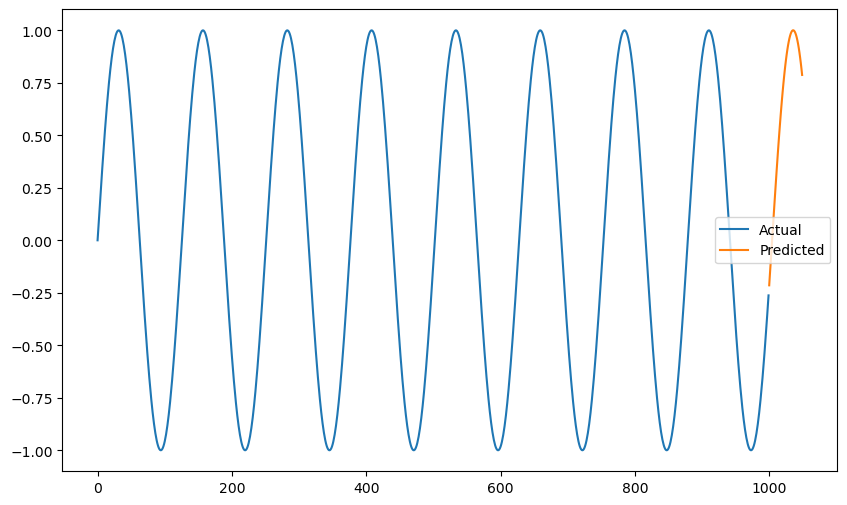

In [ ]:
# Example:

import numpy as np
import matplotlib.pyplot as plt

# Generate a sequence of numbers that follows a sine wave
numbers = [np.sin(i) for i in np.linspace(0, 50, 1000)]  # 1000 numbers between 0 and 50

# Use our function to predict the next 50 values
k = 50
predicted_values = forecast_next_values_lstm(numbers, k)

# Print the predicted values
print(predicted_values)

# Visualize the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(numbers, label='Actual')
plt.plot(range(len(numbers), len(numbers) + k), predicted_values, label='Predicted')
plt.legend()
plt.show()

# Exercise 11:

Read up on the theory behind LSTMs and discuss it with fellow participants.

# Exercise 12:

Experiment extensively with the LSTM above and come up with data sets where it yields accurate forecasts, and also those where it does not. Please keep in mind that setting hyperparameters is tricky, and even identifying those parameters in the code takes some work.

1/1 [==============================] - 0s 16ms/step
Percentage increase/decrease:  [0.9592211  0.95931363 0.9594018  0.95960283 0.9597618 ]


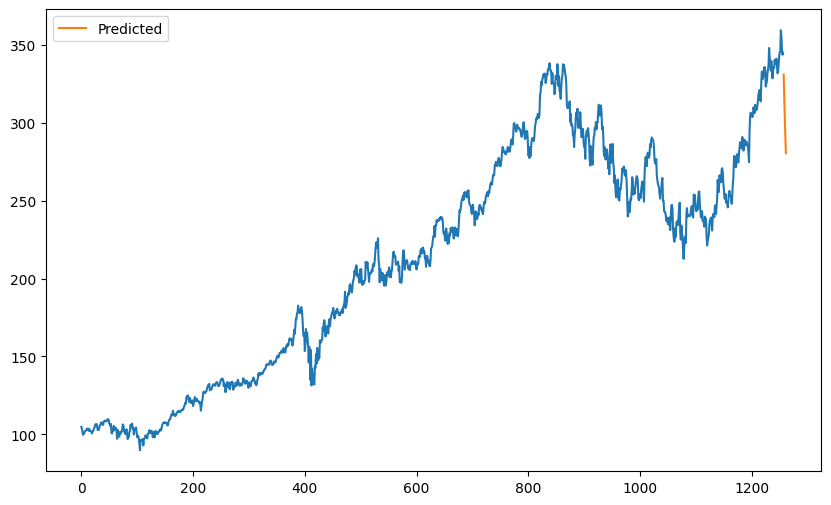

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf


msft = yf.Ticker("MSFT")
hist = msft.history(period="60mo")

closing_prices = hist['Close'].values

numbers = closing_prices  # 90 days

# Use our function to predict the next 10 values
k = 5
predicted_values = forecast_next_values_lstm(numbers, k)

# Print the predicted percentage increases
print("Percentage increase/decrease: ", predicted_values)

# adjust first predicted value
predicted_values[0] = predicted_values[0] * numbers[-1]

# adjust predicted values' prices
for i in range(1, len(predicted_values)):
  predicted_values[i] = predicted_values[i-1] * predicted_values[i]

# Visualize the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(numbers)
plt.plot(range(len(numbers), len(numbers) + k), predicted_values, label='Predicted')
plt.legend()
plt.show()

In [77]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = yf.download('TSLA', start='2018-01-01',end='2023-07-29')
stock_data.head()
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [78]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]
z_test = []

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [87]:
model = keras.Sequential()
model.add(layers.LSTM(120, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(120, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 120)           58560     
                                                                 
 lstm_17 (LSTM)              (None, 120)               115680    
                                                                 
 dense_16 (Dense)            (None, 25)                3025      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 177,291
Trainable params: 177,291
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1060/1060 [==============================] - 60s 51ms/step - loss: 7.3890e-04
Epoch 2/3
1060/1060 [==============================] - 47s 45ms/step - loss: 9.4024e-04
Epoch 3/3
1060/1060 [==============================] - 48s 45ms/step - loss: 6.5452e-04


In [89]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9/9 [==============================] - 1s 48ms/step


198.40468776183317

<ipython-input-88-395cf098c6bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


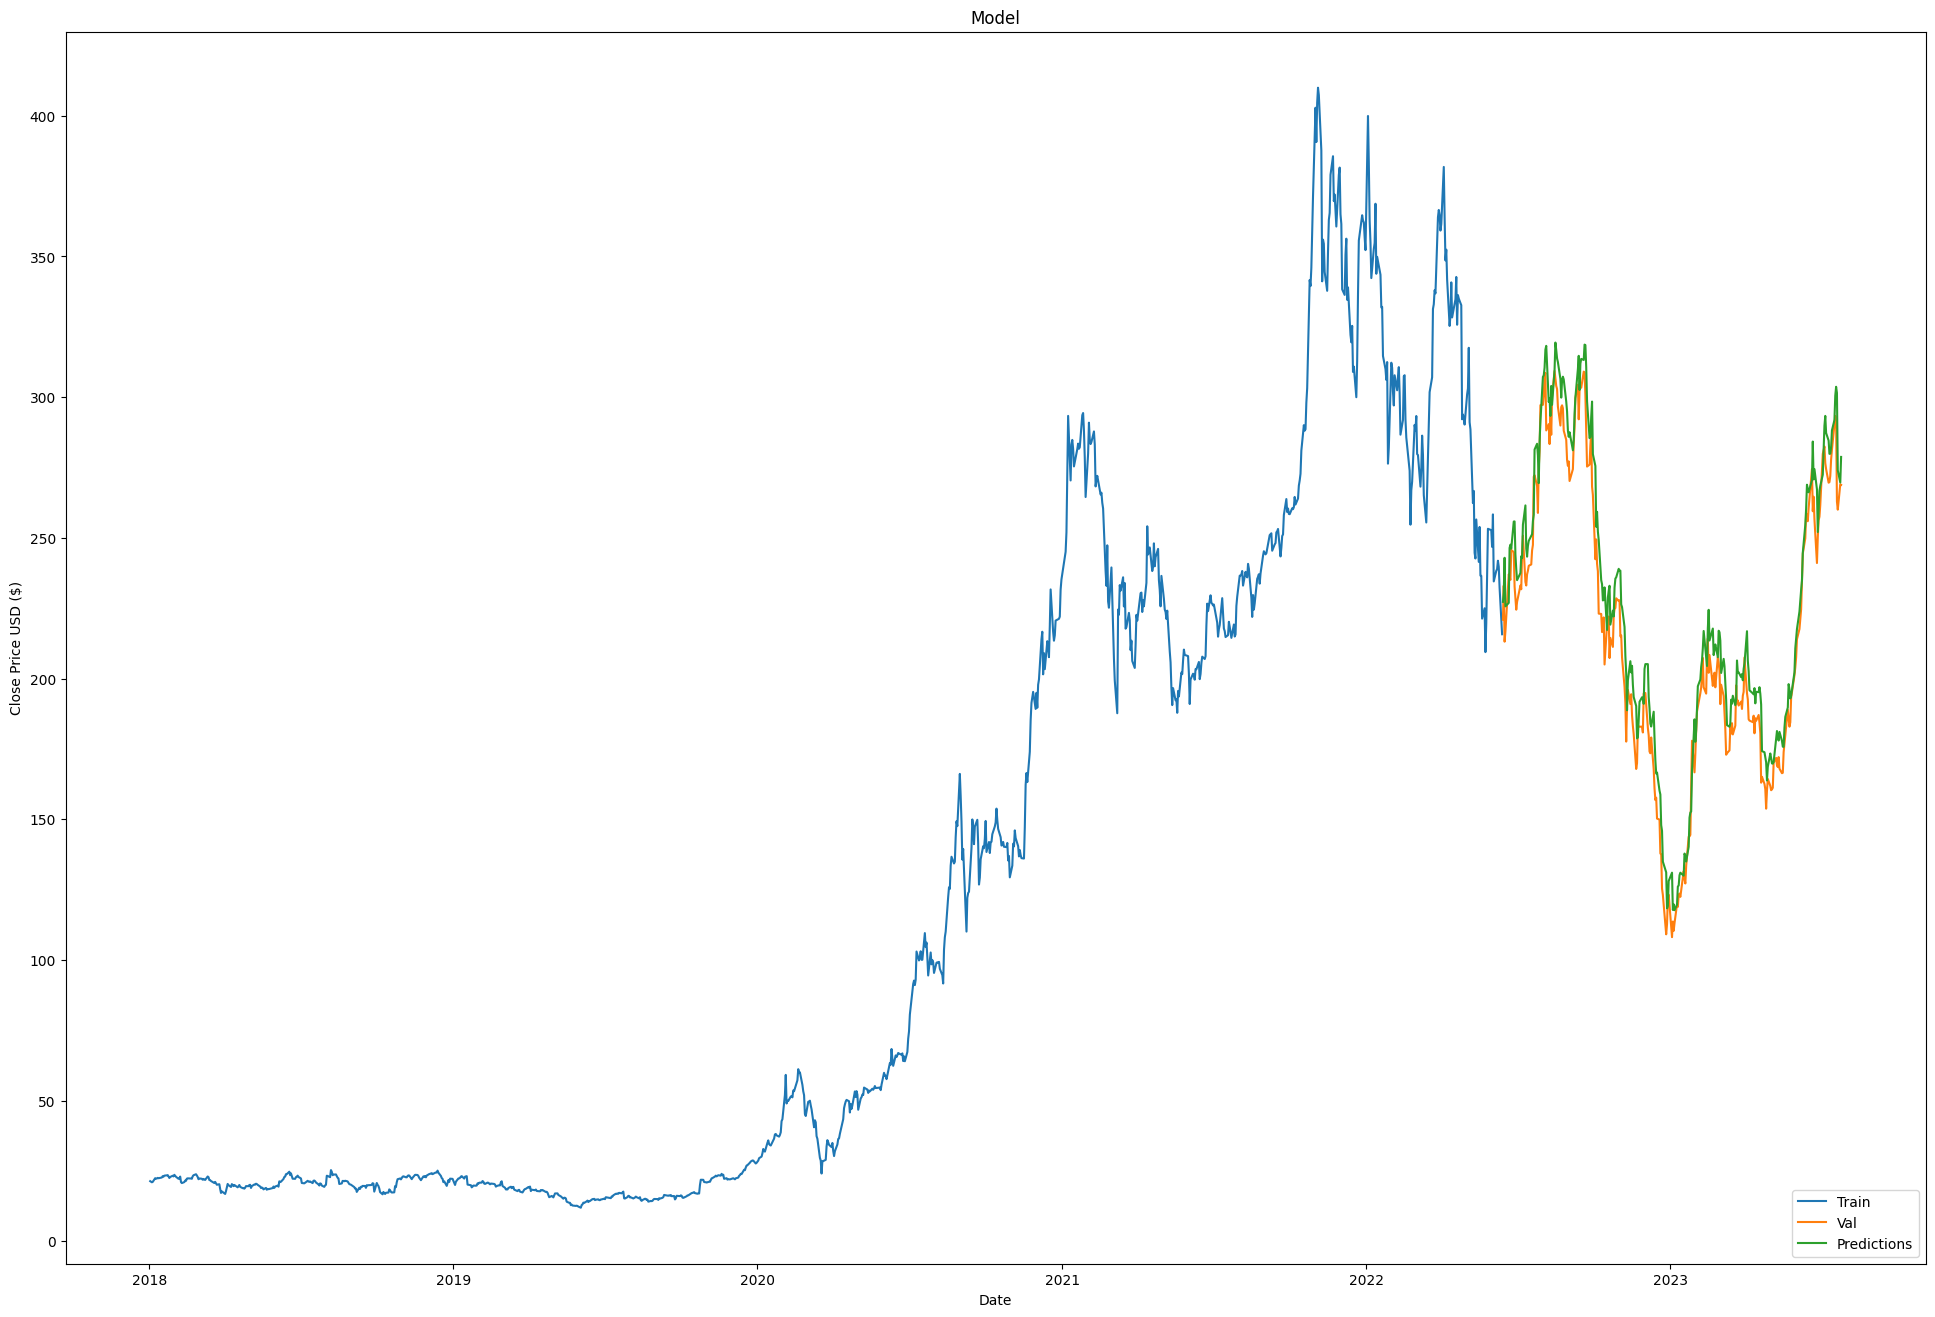

In [88]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(24,16))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [94]:
print(validation[['Close','Predictions']])

                 Close  Predictions
Date                               
2022-06-14  220.889999   227.243484
2022-06-15  233.000000   230.609390
2022-06-16  213.100006   242.918854
2022-06-17  216.759995   225.645996
2022-06-21  237.036667   226.886734
...                ...          ...
2023-07-19  291.260010   303.686218
2023-07-20  262.899994   301.510223
2023-07-21  260.019989   274.013550
2023-07-24  269.059998   269.649414
2023-07-25  268.829987   278.758331

[279 rows x 2 columns]
